# p_01 | `pandas plot`

## Ejercicio 1

1. Lea los datos de [este link](https://catalogodatos.gub.uy/dataset/fc5e7e9c-73cc-4c10-a3b7-6c27848bc095/resource/671c3626-4bed-42f7-aef1-70e29d9675ae/download/abastecimiento-de-energia-por-fuente.csv). Deberá especificar `encoding="latin1"`. Cambie los nombres de las columnas por las siguientes `["Importación electricidad", "Hidráulica", "Eólica", "Solar", "Importación gas", "Importación petróleo", "Importación carbón", "Leña/biomasa", "Residuos industriales", "Total"]`. Si no pone las fechas en el índice deberá considerar el nombre de la columna también.
3. Grafique todas las columnas, con los años en el eje de las x.
4. Repita paso anterior, pero no muestre la leyenda.
5. Grafique todas las columnas en un gráfico individual.
6. Grafique las columnas referidas a importación en un gráfico individual. Los gráficos deben compartir el eje de las x e y.
7. Repita el gráfico anterior, pero defina un estilo. El estilo debe aplicar solo a este gráfico.
8. Repita el gráfico del punto 5. La figura debe tener un título, así como cada uno de los subplots.

In [1]:
import pandas as pd

data = pd.read_csv("https://catalogodatos.gub.uy/dataset/fc5e7e9c-73cc-4c10-a3b7-6c27848bc095/resource/eb3fadb3-a0b5-4324-8742-5355632f9b24/download/abastecimiento-de-energia-por-fuente.csv", index_col=0, sep=";", encoding="latin1")
data.columns = ["Importación electricidad", "Hidráulica", "Eólica", "Solar", "Importación gas", "Importación petróleo", "Importación carbón", "Leña/biomasa", "Residuos industriales", "Total"]
data.tail()

,Importación electricidad,Hidráulica,Eólica,Solar,Importación gas,Importación petróleo,Importación carbón,Leña/biomasa,Residuos industriales,Total
AÑO,,,,,,,,,,
2019,0.0,697.4,408.7,42.0,80.8,1945.9,0.1,2161.2,6.1,5342.2
2020,44.2,352.1,470.9,45.9,59.8,2168.8,0.1,2216.9,7.7,5366.4
2021,4.7,453.5,429.2,49.0,68.4,2363.6,0.1,2269.3,7.0,5644.8
2022,7.2,489.0,411.3,51.2,71.9,2419.3,1.7,2210.7,7.2,5669.5
2023,120.2,302.4,409.8,50.3,65.7,2363.0,1.7,2804.7,8.6,6126.4


<Axes: xlabel='AÑO'>

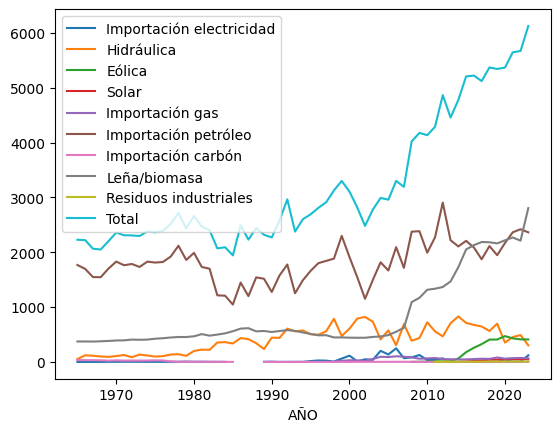

In [2]:
data.plot()

<Axes: xlabel='AÑO'>

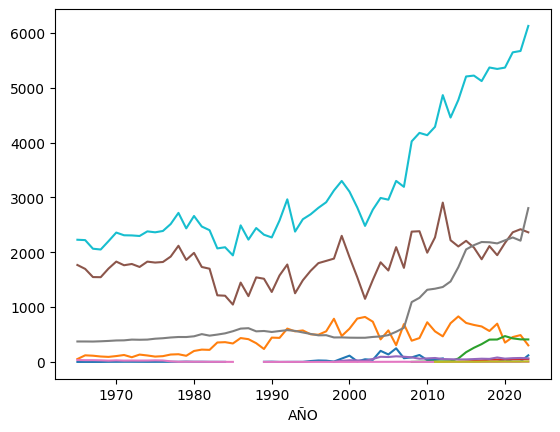

In [3]:
data.plot(legend=False)

array([[<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>],
       [<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>],
       [<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>],
       [<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>]],
      dtype=object)

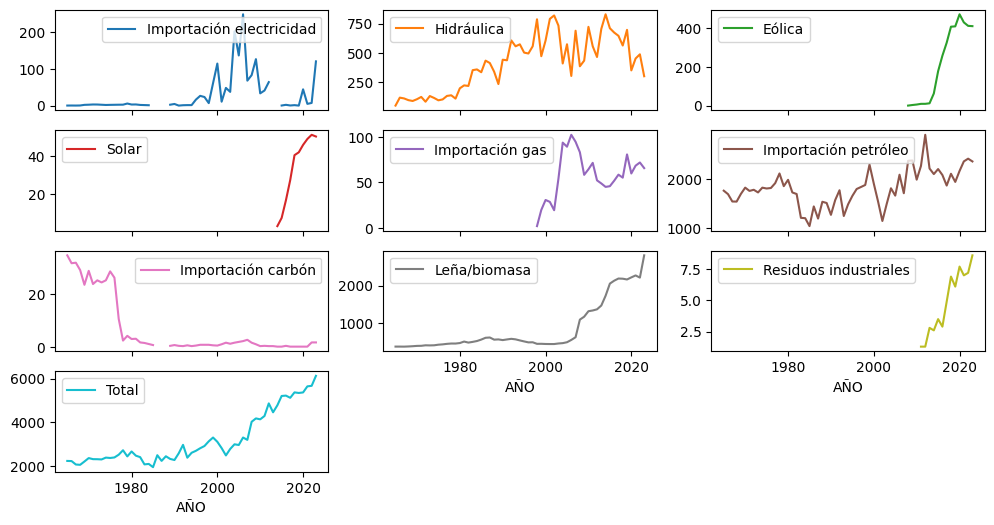

In [4]:
data.plot(subplots=True, layout=(4, 3), figsize=(12, 6))

array([[<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>],
       [<Axes: xlabel='AÑO'>, <Axes: xlabel='AÑO'>]], dtype=object)

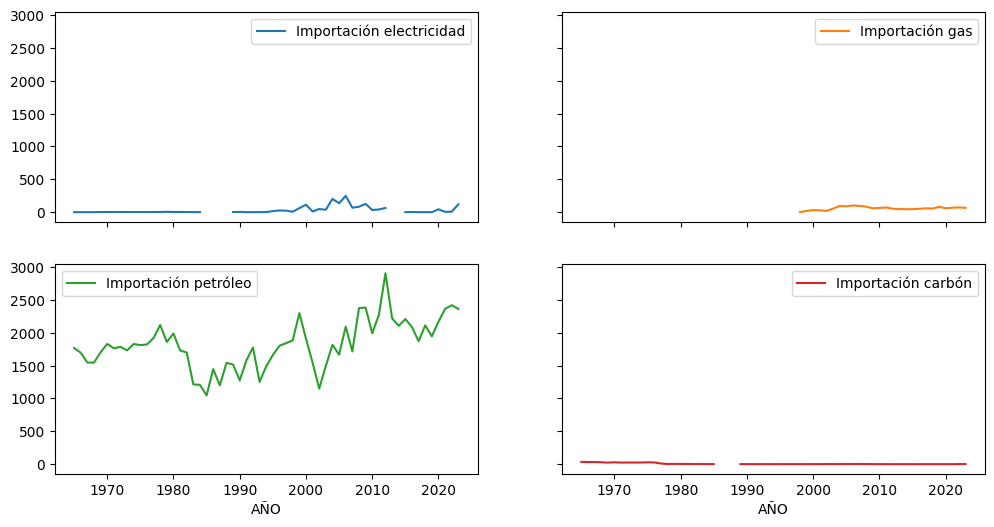

In [5]:
data.loc[:, data.columns.str.contains("Importación")].plot(subplots=True, layout=(2, 2), figsize=(12, 6), sharex=True, sharey=True)

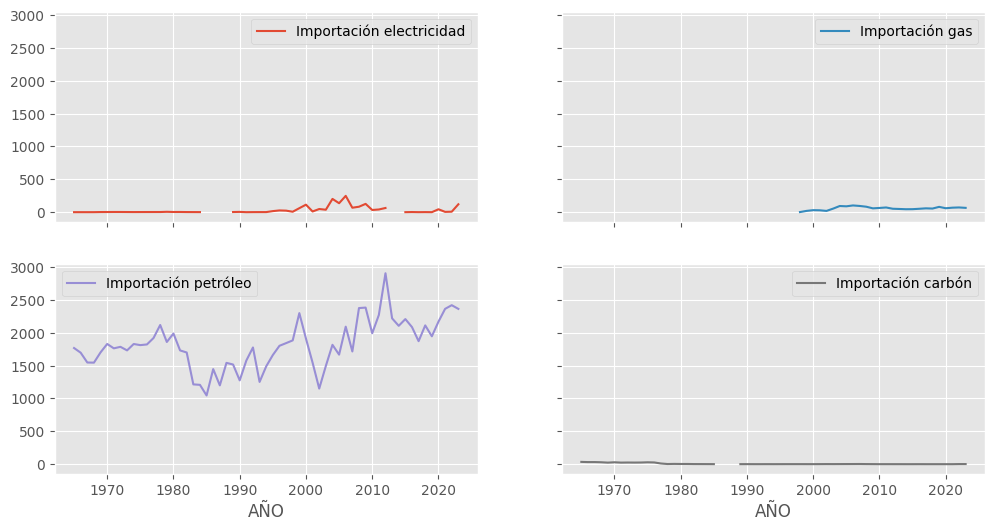

In [6]:
import matplotlib.pyplot as plt

with plt.style.context("ggplot"):
    data.loc[:, data.columns.str.contains("Importación")].plot(subplots=True, layout=(2, 2), figsize=(12, 6), sharex=True, sharey=True)
plt.show()

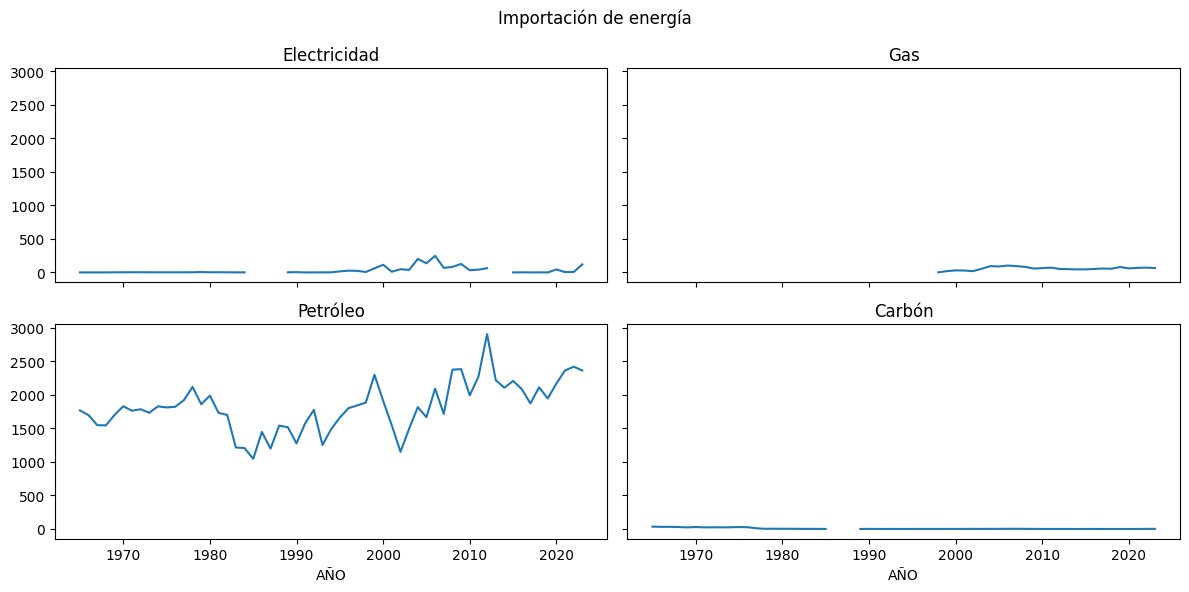

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharey=True, sharex=True)

for ax, col in zip(axs.ravel(), data.columns[data.columns.str.contains("Importación")]):
    data[col].plot(ax=ax, title=col.split()[-1].capitalize())
fig.suptitle("Importación de energía")
fig.tight_layout()
plt.show()

## Ejercicio 2

1. Lea los datos de [este link](https://catalogodatos.gub.uy/dataset/56eab9e5-a47a-4844-87df-3cac44b57d27/resource/a7ccd498-ea52-4561-a1b5-ec92f684b0a6/download/cruceros.csv). Para estos gráficos deberá usar `groupby` y `reset_index`, dado que los datos están a nivel de grupo familiar/de viaje.
2. Cambie el plotting backend de pandas a plotly. Grafique el dato de TotalPersonas contra fecha en barras.
2. Grafique el dato de GastoTotal contra Pais en barras. Los colores deben estar definidos por el Puerto.
3. Grafique un scatter con la relación entre a) GastoTours b) GastoAlimentacion. El tamaño de cada punto debe estar definido por TotalPersonas. Cada punto debe tener el color de un país. El eje de y debe estar en logaritmos.

In [8]:
data = pd.read_csv("https://catalogodatos.gub.uy/dataset/56eab9e5-a47a-4844-87df-3cac44b57d27/resource/a7ccd498-ea52-4561-a1b5-ec92f684b0a6/download/cruceros.csv", parse_dates=["Fecha"])
data.head()

,IdCruceros,idNacionalidad,Pais,Fecha,idfecha,idPuerto,Puerto,TotalPersonas,CantidadVisitas,GastoTotal,GastoTours,GastoAlimentacion,GastoTransporte,GastoShopping,GastoOtros
0,41,57,Suiza,2016-12-02,13485,1,Montevideo,6,0,0.0,0.0,0.00,0.0,0.00,0.0
1,42,59,Otro de Europa,2016-12-02,13485,1,Montevideo,4,0,200.0,100.0,40.00,40.0,20.00,0.0
2,43,41,Canada,2016-12-02,13485,1,Montevideo,4,0,100.0,100.0,0.00,0.0,0.00,0.0
3,44,32,Colombia,2016-12-02,13485,1,Montevideo,3,0,600.0,0.0,300.00,0.0,300.00,0.0
4,45,70,EE.UU.,2016-12-02,13485,1,Montevideo,2,0,200.0,0.0,98.36,0.0,101.64,0.0


<Axes: xlabel='Fecha'>

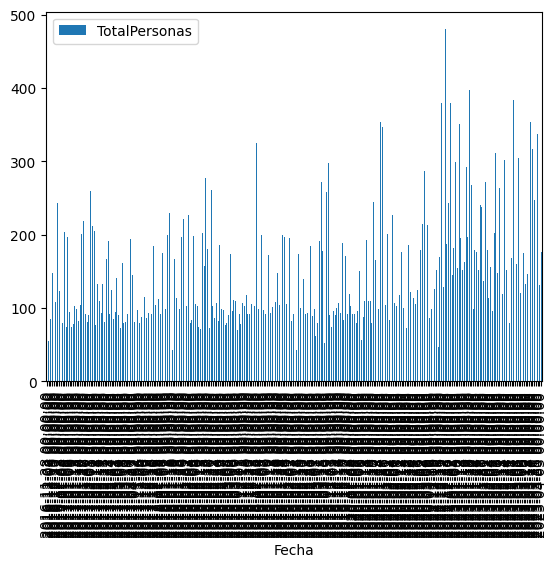

In [9]:
data.groupby(["Fecha"]).sum().reset_index().plot(y="TotalPersonas", x="Fecha", kind="bar")

In [10]:
pd.options.plotting.backend = "plotly"

data.groupby(["Pais", "Puerto"]).sum().reset_index().plot(y="GastoTotal", x="Pais", color="Puerto", kind="bar")

TypeError: datetime64 type does not support sum operations

In [ ]:
data.groupby(["Pais"]).sum().reset_index().plot(kind="scatter", y="GastoTours", x="GastoAlimentacion", size="TotalPersonas", color="Pais", log_y=True)

# Fin